# Dataset Wrangling and EDA
This notebook is used for:
1. [Initial Dataset Formatting](#1.-Initial-Dataset-Wrangling)
4. [Exploratory Data Analysis](#2.-Exploratory-Data-Analysis)

### Declaring Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LogNorm, Normalize
import sklearn

eu_data = [['Austria', 'AT'], ['Belgium', 'BE'], ['Bulgaria', 'BG'], ['Croatia', 'HR'], ['Cyprus', 'CY'], ['Czechia', 'CZ'], ['Denmark', 'DK'], ['Estonia', 'EE'], ['Finland', 'FI'], ['France', 'FR'], ['Germany', 'DE'], ['Greece', 'EL'], ['Hungary', 'HU'], ['Ireland', 'IE'], ['Italy', 'IT'], ['Latvia', 'LV'], ['Lithuania', 'LT'], ['Luxembourg', 'LU'], ['Malta', 'MT'], ['Netherlands', 'NL'], ['Poland', 'PL'], ['Portugal', 'PT'], ['Romania', 'RO'], ['Slovakia', 'SK'], ['Slovenia', 'SI'], ['Spain', 'ES'], ['Sweden', 'SE'], ['United Kingdom', 'UK'], ['Iceland', 'IS'], ['Liechtenstein', 'LI'], ['Norway', 'NO'], ['Switzerland', 'CH'], ['Montenegro', 'ME']]
eu_codes = pd.DataFrame(eu_data, columns=['full', 'abbr'])
eu_codes = eu_codes.set_index(eu_codes['abbr']).drop('abbr', axis=1)

### Color Palette & Typeface Sizing

In [2]:
YELLOW = '#F2DC5D'
GREEN = '#9BC53D'
DARK_GREEN = '#597222'
RED = '#C3423F'
LIGHT_BLUE = '#2596BE'
GRAY = '#666666'
WHITE = '#FFFFFF'

AXIS_SIZE = 12
TITLE_SIZE = 16
DESCRIPTION_SIZE = 9
FIGURE_SIZE = (10*2/3,6*2/3)
EXPORT_DPI = 400

RANDOM_STATE = 14

## 1. Initial Dataset Wrangling

### Import initial Eurostat dataset

In [3]:
df0 = pd.read_csv('../old_data/four_final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'OBS_VALUE': "Int64", 'OBS_FLAG': 'string'}, na_filter = False).drop("Unnamed: 0", axis=1)
df0

,citizen,sex,age,decision,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,AD,F,UNK,GENCONV,AT,2008-Q1,0,
1,AD,F,UNK,GENCONV,AT,2008-Q2,0,
2,AD,F,UNK,GENCONV,AT,2008-Q3,0,
3,AD,F,UNK,GENCONV,AT,2008-Q4,0,
4,AD,F,UNK,GENCONV,AT,2009-Q1,0,
...,...,...,...,...,...,...,...,...
28862287,ZW,UNK,Y_LT14,SUB_PROT,UK,2019-Q3,0,
28862288,ZW,UNK,Y_LT14,SUB_PROT,UK,2019-Q4,0,
28862289,ZW,UNK,Y_LT14,SUB_PROT,UK,2020-Q1,0,
28862290,ZW,UNK,Y_LT14,SUB_PROT,UK,2020-Q2,0,


### Dataset formatting

In [52]:
#sort everything for pivot
cols = ['citizen', 'sex', 'age', 'geo', 'TIME_PERIOD', 'decision', 'OBS_VALUE', 'OBS_FLAG']
sort_order = ['citizen', 'sex', 'age', 'geo', 'TIME_PERIOD']
df0[cols].sort_values(by=sort_order) 

#pivot shared demographics into one column
index = ['citizen', 'sex', 'age', 'geo', 'TIME_PERIOD']
columns = 'decision'
values = 'OBS_VALUE'
df1 = df0.pivot(index=index, columns=columns, values=values)

#reset indicies
df1.reset_index(inplace=True)

#reorder columns
cols1 = ['citizen', 'sex', 'age', 'geo', 'TIME_PERIOD', "GENCONV", "HUMSTAT", "SUB_PROT", "REJECTED"]
df1 = df1[cols1]

#df2 = df1.fill_na(0)

df1

decision,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED
0,AD,F,UNK,AT,2008-Q1,0,0,0,0
1,AD,F,UNK,AT,2008-Q2,0,0,0,0
2,AD,F,UNK,AT,2008-Q3,0,0,0,0
3,AD,F,UNK,AT,2008-Q4,0,0,0,0
4,AD,F,UNK,AT,2009-Q1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0


### Simple feature expansion

In [ ]:
df2["TOTAL_POS"] = df2["GENCONV"] + df2["HUMSTAT"] + df2["SUB_PROT"]
df2["TOTAL_APPS"] = df2["TOTAL_POS"] + df2["REJECTED"]
df2

In [ ]:
#df2.to_csv('../data/final.csv', index=False)

## 2. Exploratory Data Analysis
### Importing formatted dataset

In [5]:
df = pd.read_csv('../data/final.csv', dtype={'citizen': 'string', 'sex': 'string', 'age': 'string', 'decision': 'string', 'geo': 'string', 'TIME_PERIOD': 'string', 'GENCONV': "Int64", 'HUMSTAT': "Int64", 'SUB_PROT': "Int64", 'REJECTED': "Int64", 'TOTAL_POS': "Int64", 'TOTAL_APPS': "Int64", "POS_RATE": "Float64"}, keep_default_na=False, na_values=['nan'])

##remove partial 2023-Q3 Data
df = df[df["TIME_PERIOD"] != "2023-Q3"]

df

,citizen,sex,age,geo,TIME_PERIOD,GENCONV,HUMSTAT,SUB_PROT,REJECTED,TOTAL_POS,TOTAL_APPS
0,AD,F,UNK,AT,2008-Q1,0,0,0,0,0,0
1,AD,F,UNK,AT,2008-Q2,0,0,0,0,0,0
2,AD,F,UNK,AT,2008-Q3,0,0,0,0,0,0
3,AD,F,UNK,AT,2008-Q4,0,0,0,0,0,0
4,AD,F,UNK,AT,2009-Q1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7221109,ZW,UNK,Y_LT14,UK,2019-Q3,0,0,0,0,0,0
7221110,ZW,UNK,Y_LT14,UK,2019-Q4,0,0,0,0,0,0
7221111,ZW,UNK,Y_LT14,UK,2020-Q1,0,0,0,0,0,0
7221112,ZW,UNK,Y_LT14,UK,2020-Q2,0,0,0,0,0,0


In [ ]:
fig_title = "histogram.png"
fig_description="""A decision-specific stacked bar chart showing the count of each asylum outcome by 
quarter since 2008."""

decisions_by_time = df.groupby(['TIME_PERIOD']).sum(numeric_only=True).drop("TOTAL_APPS", axis=1).drop("TOTAL_POS", axis=1)
decisions_by_time.plot(kind='bar', stacked=True,figsize=FIGURE_SIZE, width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('count', fontsize=AXIS_SIZE)
plt.title('outcome of asylum applications over time', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.18, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Asylum Applications Over Time

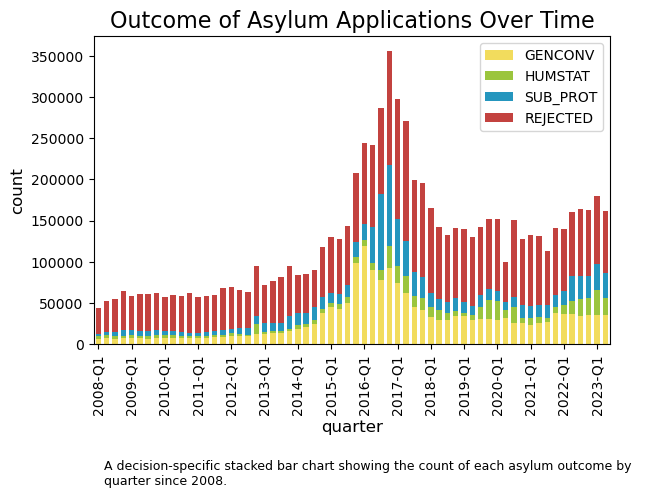

In [45]:
fig_title = "asylum-outcomes-over-time.png"
fig_description="""A decision-specific stacked bar chart showing the count of each asylum outcome by 
quarter since 2008."""

decisions_by_time = df.groupby(['TIME_PERIOD']).sum(numeric_only=True).drop("TOTAL_APPS", axis=1).drop("TOTAL_POS", axis=1)
decisions_by_time.plot(kind='bar', stacked=True,figsize=FIGURE_SIZE, width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('count', fontsize=AXIS_SIZE)
plt.title('Outcome of Asylum Applications Over Time', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.18, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Total Accepted & Rejected Applications Each Quarter

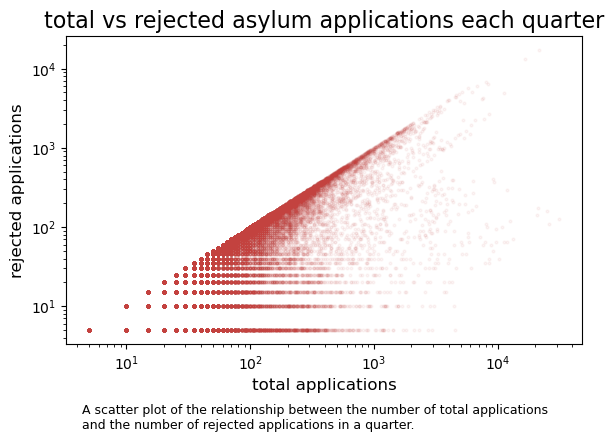

In [7]:
fig_title = "rejected-vs-total-scatter.png"
fig_description="""A scatter plot of the relationship between the number of total applications 
and the number of rejected applications in a quarter."""

df.plot.scatter('TOTAL_APPS','REJECTED',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=RED) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('rejected applications', fontsize=AXIS_SIZE)
plt.title("total vs rejected asylum applications each quarter", fontsize=TITLE_SIZE)


plt.figtext(0.15, -0.04, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

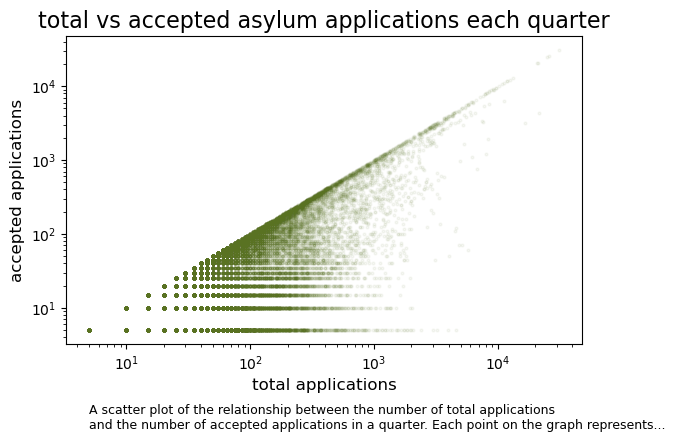

In [8]:
fig_title = "accepted-vs-total-scatter.png"
fig_description="""A scatter plot of the relationship between the number of total applications 
and the number of accepted applications in a quarter. Each point on the graph represents..."""

df.plot.scatter('TOTAL_APPS','TOTAL_POS',figsize=FIGURE_SIZE,alpha=0.05,s=4,c=DARK_GREEN) # alpha=0.1,s=10
#add coloring by country or time period
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('total applications', fontsize=AXIS_SIZE)
plt.ylabel('accepted applications', fontsize=AXIS_SIZE)
plt.title("total vs accepted asylum applications each quarter", fontsize=TITLE_SIZE)

plt.figtext(0.16, -0.04, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Accepted Applications Over Time by Country of Asylum

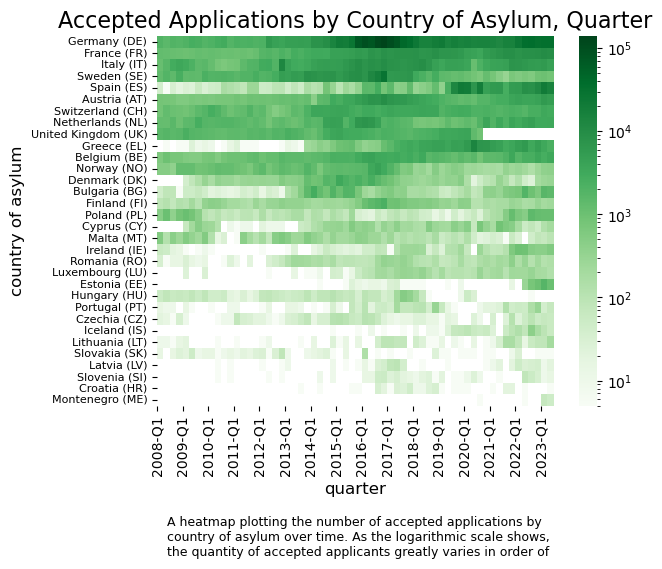

In [44]:
fig_title = "accepted-by-geo-heatmap.png"
fig_description="""A heatmap plotting the number of accepted applications by 
country of asylum over time. As the logarithmic scale shows, 
the quantity of accepted applicants greatly varies in order of magnitude by country and quarter."""

accepted_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["TOTAL_POS"].astype(float).unstack()
#remove non-accepting countries
MIN_ACCEPTED = 100
accepted_by_country = accepted_by_country[accepted_by_country.sum(axis=1) > MIN_ACCEPTED]
#sort rows by average value (bc they're categorical)
countries_by_average = accepted_by_country.mean(axis=1).sort_values(ascending=False).index
accepted_by_country = accepted_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(accepted_by_country, norm=LogNorm(), cmap="Greens")
#sns.set(rc={'figure.figsize':FIGURE_SIZE})

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of asylum', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Accepted Applications by Country of Asylum, Quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Rejected Applications Over Time by Country of Asylum

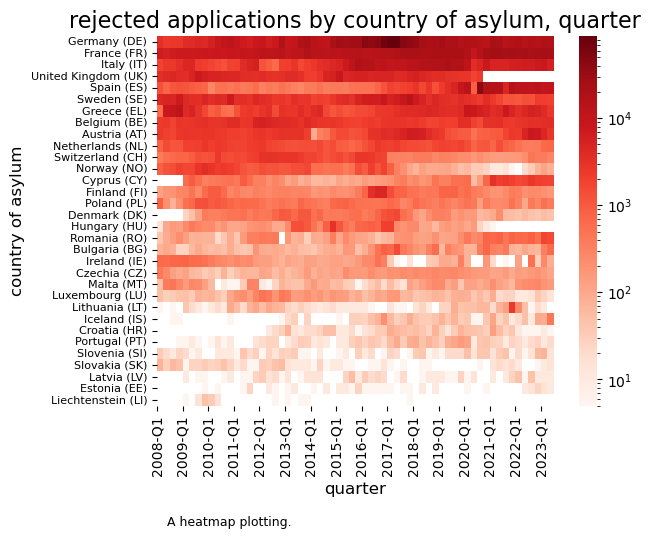

In [10]:
fig_title = "rejected-by-country-heatmap.png"
fig_description="""A heatmap plotting the number of rejected applications by 
country of asylum over time. As the logarithmic scale shows, 
the quantity of rejected applicants greatly varies in order of magnitude by country and quarter."""

rejected_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["REJECTED"].astype(float).unstack()

#remove non-accepting countries
MIN_REJECTED = 100
rejected_by_country = rejected_by_country[rejected_by_country.sum(axis=1) > MIN_REJECTED]
#sort rows by average value (bc they're categorical)
countries_by_average = rejected_by_country.mean(axis=1).sort_values(ascending=False).index
rejected_by_country = rejected_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(rejected_by_country, norm=LogNorm(), cmap="Reds")

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of asylum', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('rejected applications by country of asylum, quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Acceptance Rate by Country of Asylum

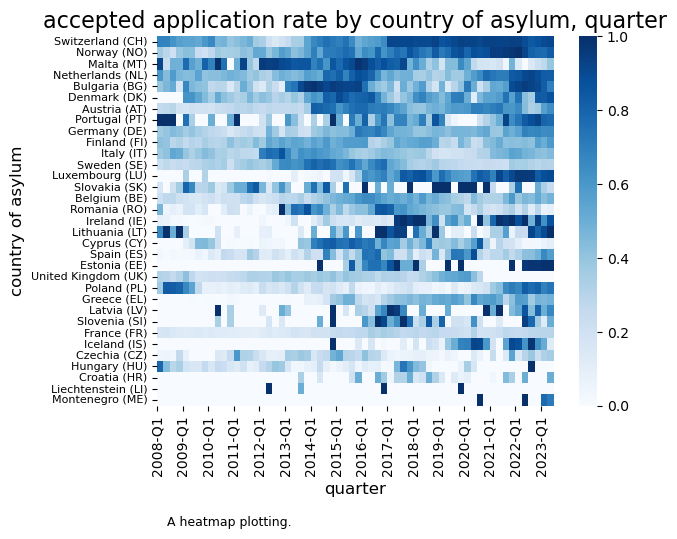

In [11]:
fig_title = "rate-by-country-heatmap.png"
fig_description="""A heatmap plotting the acceptance rate by 
country of asylum over time."""

accepted_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["TOTAL_POS"].astype(float).unstack()
rejected_by_country = df.groupby(['geo', 'TIME_PERIOD']).sum(numeric_only=True)["REJECTED"].astype(float).unstack()
rate_by_country = accepted_by_country / (accepted_by_country + rejected_by_country)
rate_by_country = rate_by_country.fillna(0)
#sort rows by average value (bc they're categorical)
countries_by_average = rate_by_country.mean(axis=1).sort_values(ascending=False).index
rate_by_country = rate_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(rate_by_country, cmap="Blues") #norm=LogNorm(),
#sns.set(rc={'figure.figsize':FIGURE_SIZE})

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of asylum', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('accepted application rate by country of asylum, quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Accepted Applications by Country of Citizenship

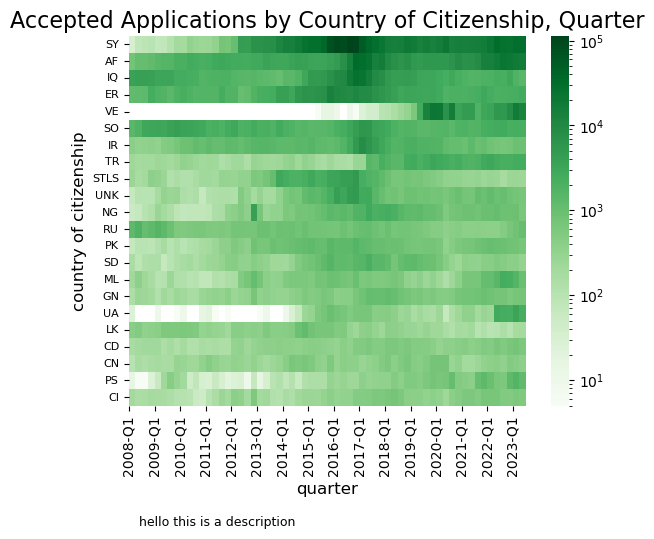

In [39]:
fig_title = "accepted-by-citizenship-heatmap.png"
fig_description="""A heatmap plotting the number of accepted applications by 
country of citizenship over time."""

accepted_by_country = df.groupby(['citizen', 'TIME_PERIOD']).sum(numeric_only=True)["TOTAL_POS"].astype(float).unstack()
#remove non-accepting countries
MIN_ACCEPTED = 20000
accepted_by_country = accepted_by_country[accepted_by_country.sum(axis=1) > MIN_ACCEPTED]
#sort rows by average value (bc they're categorical)
countries_by_average = accepted_by_country.mean(axis=1).sort_values(ascending=False).index
accepted_by_country = accepted_by_country.reindex(countries_by_average, axis=0)

sns.heatmap(accepted_by_country, norm=LogNorm(), cmap="Greens")

X_TICKS = 4
times = np.unique(df['TIME_PERIOD'])
plt.xticks(range(0, len(times), X_TICKS), times[::X_TICKS], rotation = 90)
plt.xlabel('quarter', fontsize=AXIS_SIZE)
plt.ylabel('country of citizenship', fontsize=AXIS_SIZE)
plt.yticks(fontsize=8, rotation=0)
#plt.gca().set_yticks(np.arange(len(countries_by_average)) + 0.5)
#y_labels = eu_codes.reindex(countries_by_average)["full"].values + " (" + countries_by_average + ")"
#plt.gca().set_yticklabels(y_labels)
#plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.title('Accepted Applications by Country of Citizenship, Quarter', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Application Outcome by Age

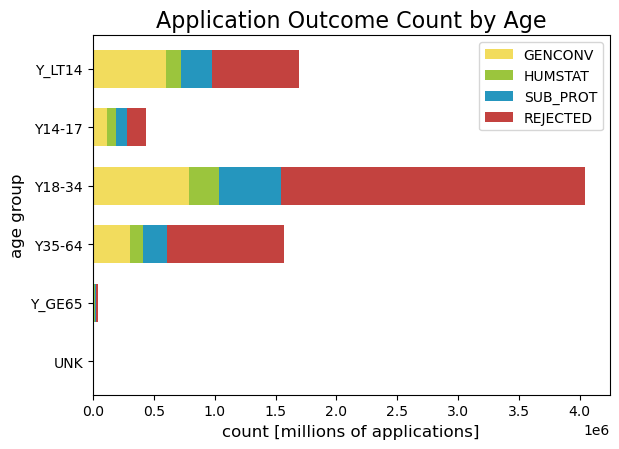

In [42]:
fig_title = "outcome-by-age-bar.png"
fig_description="""A stacked bar chart showing application outcome counts by age."""

AGE_ORDER = ["Y_LT14", "Y14-17", "Y18-34", "Y35-64", "Y_GE65", "UNK"]
AGE_ORDER.reverse()
data = df.groupby(['age']).sum(numeric_only=True).drop("TOTAL_POS", axis=1).drop("TOTAL_APPS", axis=1).reindex(AGE_ORDER)
data.plot(kind='barh', stacked=True, figsize=(10*2/3,7*2/3), width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

plt.xlabel('count [millions of applications]', fontsize=AXIS_SIZE)
plt.ylabel('age group', fontsize=AXIS_SIZE)
plt.title('Application Outcome Count by Age', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

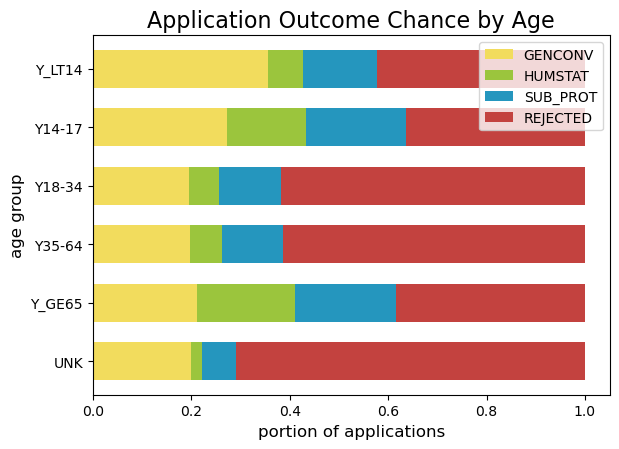

In [46]:
fig_title = "outcome-chance-by-age-bar.png"
fig_description="""A stacked bar chart showing the relative portion of outcomes by age."""

AGE_ORDER = ["Y_LT14", "Y14-17", "Y18-34", "Y35-64", "Y_GE65", "UNK"]
AGE_ORDER.reverse()
data = df.groupby(['age']).sum(numeric_only=True).drop("TOTAL_POS", axis=1).drop("TOTAL_APPS", axis=1).reindex(AGE_ORDER)
data = data.div(data.sum(axis=1), axis=0)
data.plot(kind='barh', stacked=True, figsize=(10*2/3,7*2/3), width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

plt.xlabel('portion of applications', fontsize=AXIS_SIZE)
plt.ylabel('age group', fontsize=AXIS_SIZE)
plt.title('Application Outcome Chance by Age', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

### Application Outcome By Sex

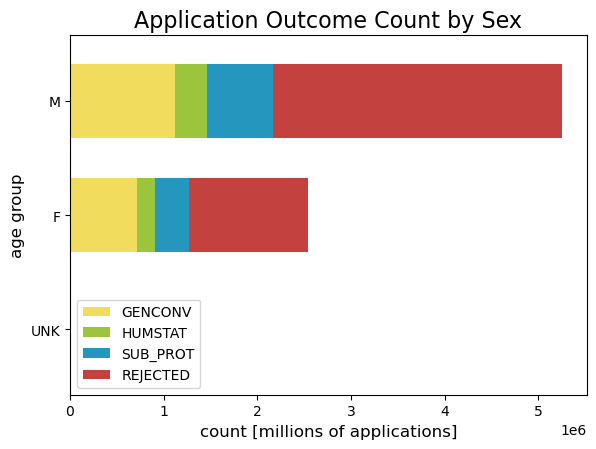

In [49]:
fig_title = "outcome-by-sex-bar.png"
fig_description="""A stacked bar chart showing application outcome counts by sex."""

AGE_ORDER = ["M", "F", "UNK"]
AGE_ORDER.reverse()
data = df.groupby(['sex']).sum(numeric_only=True).drop("TOTAL_POS", axis=1).drop("TOTAL_APPS", axis=1).reindex(AGE_ORDER)
data.plot(kind='barh', stacked=True, figsize=(10*2/3,7*2/3), width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

plt.xlabel('count [millions of applications]', fontsize=AXIS_SIZE)
plt.ylabel('age group', fontsize=AXIS_SIZE)
plt.title('Application Outcome Count by Sex', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()

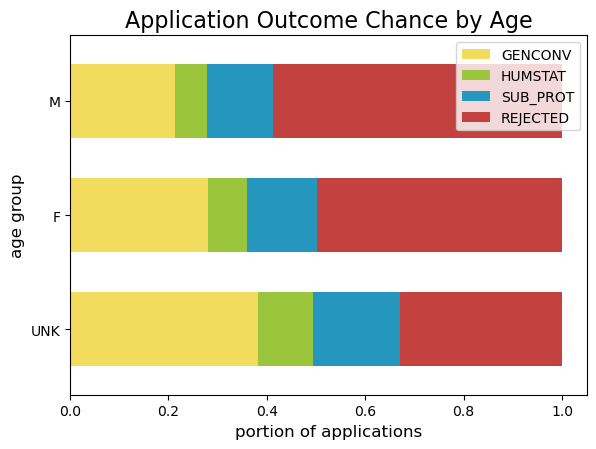

In [50]:
fig_title = "outcome-chance-by-sex-bar.png"
fig_description="""A stacked bar chart showing the relative portion of outcomes by sex."""

AGE_ORDER = ["M", "F", "UNK"]
AGE_ORDER.reverse()
data = df.groupby(['sex']).sum(numeric_only=True).drop("TOTAL_POS", axis=1).drop("TOTAL_APPS", axis=1).reindex(AGE_ORDER)
data = data.div(data.sum(axis=1), axis=0)
data.plot(kind='barh', stacked=True, figsize=(10*2/3,7*2/3), width=0.65, color=[YELLOW, GREEN, LIGHT_BLUE, RED])

plt.xlabel('portion of applications', fontsize=AXIS_SIZE)
plt.ylabel('age group', fontsize=AXIS_SIZE)
plt.title('Application Outcome Chance by Age', fontsize=TITLE_SIZE)

plt.figtext(0.14, -0.12, fig_description, wrap=False, horizontalalignment='left', verticalalignment='top', fontsize=DESCRIPTION_SIZE)
plt.savefig("../figures/" + fig_title, bbox_inches="tight", pad_inches=0.4, dpi=EXPORT_DPI, transparent=False)
plt.show()